# 911 Calls Capstone Project - Analysing the frequency of emergency 911 calls 

### Importing required python libraries 

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

### Reading csv file into a dataframe and checking the file characterstics ,datatypes and the sample data of the file.

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Analyzing the data 

In [6]:
# Checking the top 5 zipcodes for 911 calls

df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
# Checking the top 5 townships (twp) for 911 calls

df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [8]:
# Checking unique title codes

df["title"].nunique()

110

### Creating new features/columns based on the data already available

In [9]:
df["Reason"] = df["title"].apply(lambda reason: reason.split(':')[0])

In [40]:
# No. of times 911 call was made based on the particular reason

df["Reason"].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

### Using seaborn to create a countplot of 911 calls by Reason.

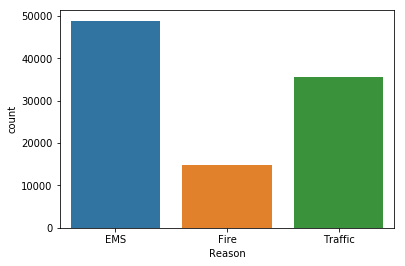

In [57]:
# Plotting the number of 911 calls made for a particular 'Reason'.

sns.countplot(x="Reason",data=df)

###### The above plot indicates that the number of 911 calls for Fire emergency was least and the maximum calls were made due to some medical emergency

### Breaking timestamp column to check the various attributes of time to analyse data deeper

In [12]:
type(df['timeStamp'].iloc[0])

str

In [13]:
# Converting timestamp from str into date time objects

df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [14]:
time = df['timeStamp'].iloc[0]

In [48]:
# Creating Hour,month,Day of Week columns based on timestamp column to analyse the count of 911 calls 
# at a specific interval of time

df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

df['Day of Week'] = df['Day of Week'].astype(int)


In [49]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [50]:
# Map strings to the day of week

df["Day of Week"] = df["Day of Week"].map(dmap)

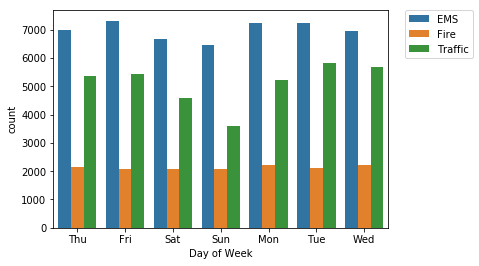

In [56]:
# Plotting the number of 911 calls made during day of week

sns.countplot(x='Day of Week',data = df , hue = 'Reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

###### The above plot indicates that the number of 911 calls were least on Sunday for Traffic and medical emergency(EMS)

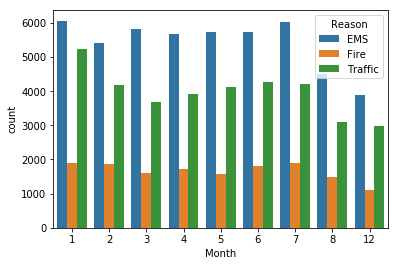

In [58]:
# Plotting the number of 911 calls made in a month

sns.countplot(x='Month',data = df,hue = 'Reason')

###### The months from 9 to 11 are missing in the data and therefore not reflected in the plot. So planning to create a line plot to fill the missing months

In [59]:

byMonth = df.groupby("Month").count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Date
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


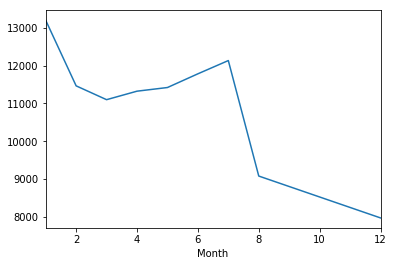

In [61]:
# Data of months from Sept to Nov are missing, so plotting the information in another way

byMonth['lat'].plot(kind = "line")

###### The missing points are filled to check the trend from month 8 to month 12 which shows the number of calls decreased from month 8 to month 12

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


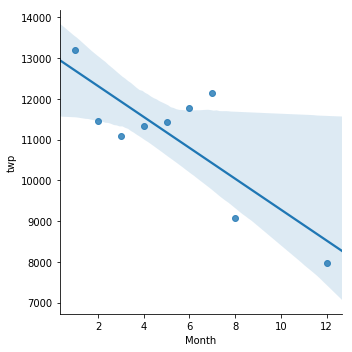

In [62]:
# Resetting index to make month as a column and creating a linear model plot to get the count with respect to month.

sns.lmplot(x = "Month", y = "twp", data = byMonth.reset_index())

###### The above lm plot shows the error in shaded area and this area is more between month 8 and 12 because we have less information between these months

In [26]:
# Creating Date column

time = df["timeStamp"].iloc[0]
df["Date"] = df["timeStamp"].apply(lambda time:time.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


(735933.0, 736208.0)

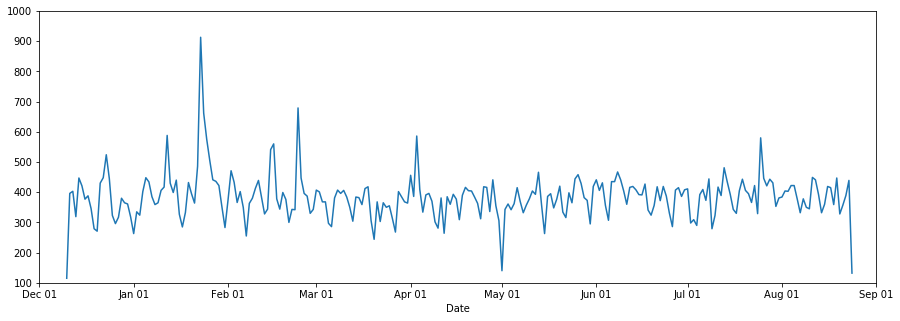

In [67]:
# Plotting Date against the count of calls. Using DateFormatter to format the date on the graph

fig, ax = plt.subplots(figsize=(15,5))
df.groupby("Date").count()["lat"].plot(ax=ax)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_ylim([100,1000])
ax.set_xlim(['Dec 2015','Sep 2016'])

###### There is a significant spike during the month of February as per the above plot

Text(0.5,1,'Traffic')

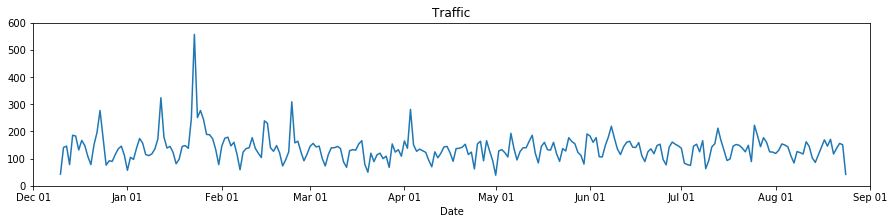

In [69]:
# Plotting Date against the count of calls , for Reason - Traffic

fig, ax = plt.subplots(figsize=(15,3))
df[df['Reason']=='Traffic'].groupby("Date").count()["lat"].plot(ax=ax)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_ylim([0,600])
ax.set_xlim(['Dec 2015','Sep 2016'])
plt.title("Traffic")

Text(0.5,1,'Fire')

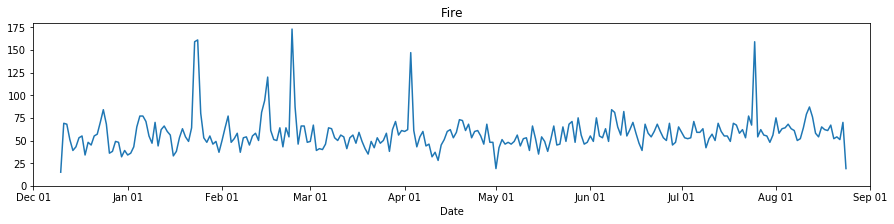

In [70]:
# Plotting Date against the count of calls , for Reason - Fire

fig, ax = plt.subplots(figsize=(15,3))
df[df['Reason']=='Fire'].groupby("Date").count()["lat"].plot(ax=ax)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_ylim([0,180])
ax.set_xlim(['Dec 2015','Sep 2016'])
plt.title("Fire")

Text(0.5,1,'EMS')

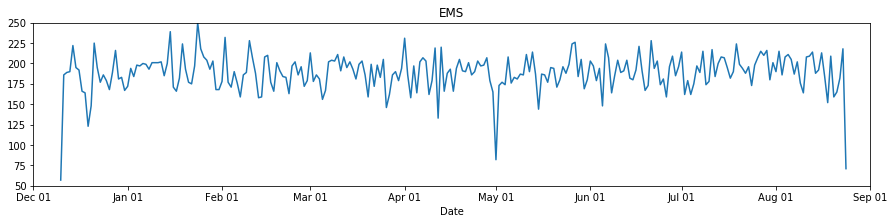

In [71]:
# Plotting Date against the count of calls , for Reason - EMS(Medical Emergency)

fig, ax = plt.subplots(figsize=(15,3))
df[df['Reason']=='EMS'].groupby("Date").count()["lat"].plot(ax=ax)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_ylim([50,250])
ax.set_xlim(['Dec 2015','Sep 2016'])
plt.title("EMS")

In [72]:
# Creating multi level index and then unstacking one of the index into column and calculating the count against 
# the 2 indices

df_day = df.groupby(["Day of Week" , "Hour"])["Reason"].count().unstack()
df_day

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


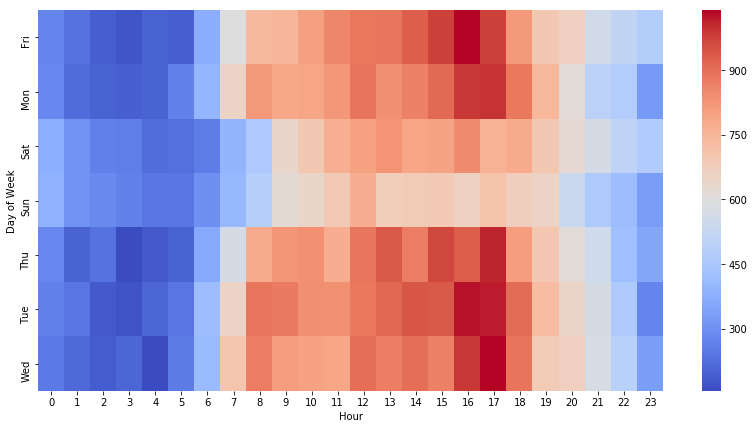

In [81]:
# Plotting a heapmap by detailing the number of calls made on a particular day at particular hour

plt.figure(figsize=(14,7))
sns.heatmap(df_day,cmap = 'coolwarm')

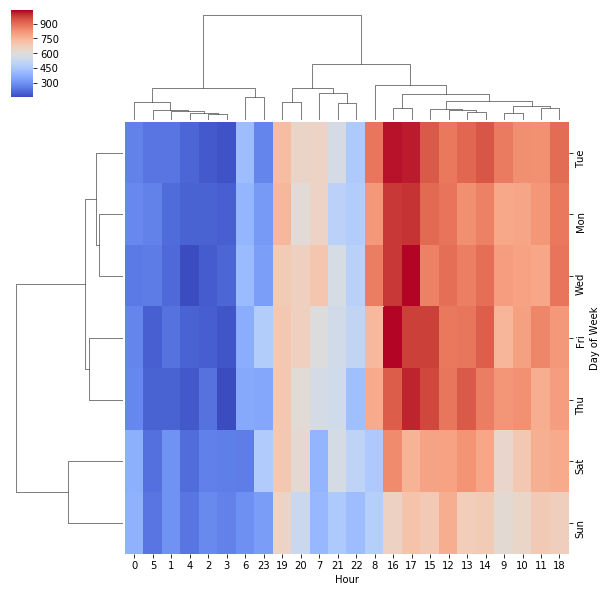

In [83]:
# Clustermap 
plt.figure(figsize=(20,5))
sns.clustermap(df_new,cmap = 'coolwarm')

In [35]:
# Plotting a heatmap by detailing the number of calls made in a particular month on a particular day of week

df_month = df.groupby(["Day of Week" , "Month"])["lat"].count().unstack()
df_month

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


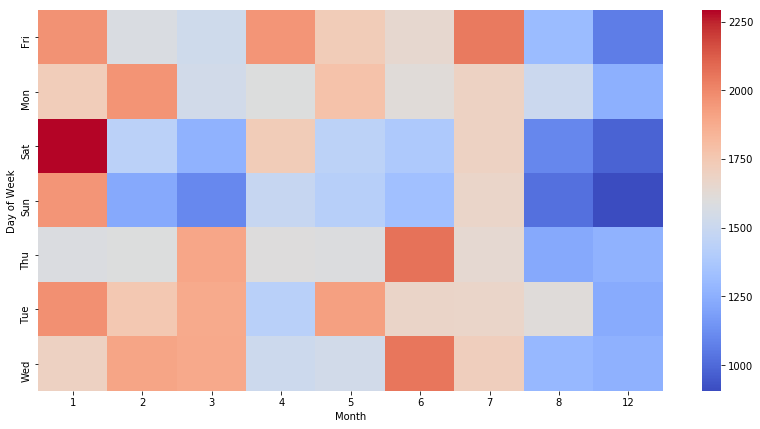

In [79]:
# Plotting a heatmap by detailing the number of calls made on a particular day in a particular month

plt.figure(figsize=(14,7))
sns.heatmap(df_month,cmap = 'coolwarm')

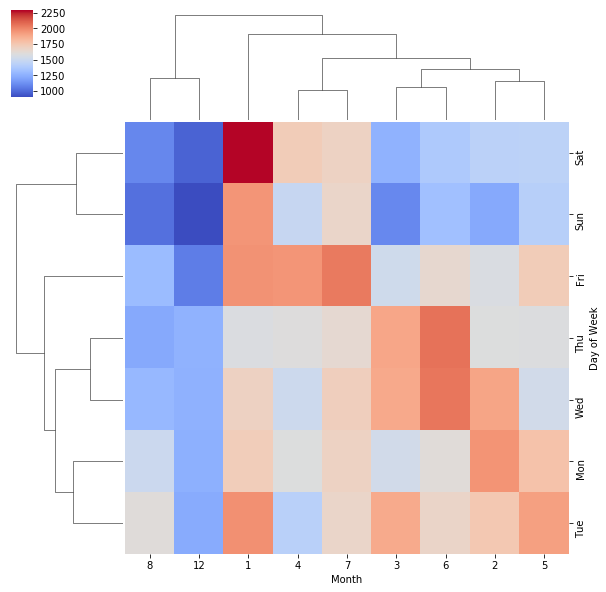

In [80]:
# Clustermap

plt.figure(figsize=(14,7))
sns.clustermap(df_month,cmap = 'coolwarm')

# Conclusion

- The number of 911 calls were made between 8:00 to 18:00 hours maybe because people are mostly asleep during night.
- The number of 911 calls were least on Saturdays and Sundays
- The highest number of calls were made in the month of Jan on Saturday, Otherwise the calls were usually on the lower side on Saturdays and Sundays. 
- The Summer months usally had more 911 calls than winter months.
- The number of 911 calls for Fire emergency was least and the maximum calls were made due to some medical emergency
- The number of 911 calls decreased considerably from month August to December. 
